In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import pandas as pd
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt

from utilities import read_data, read_pin, scanners

## Import Data

In [3]:
pin = read_pin("../Data/pin.csv")
data = read_data("../Data/rssi5.csv")

All beacons: ['0117C55D14E4']
Selecting all


In [4]:
data

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,2019-12-12 01:47:54.481,V1_26,-69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49659,2019-12-12 01:47:54.683,V1_26,NaN,NaN,NaN,-77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49660,2019-12-12 01:47:54.736,V1_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49661,2019-12-12 01:47:54.772,V1_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.0,NaN,NaN,NaN,NaN


## Inspect Data based on Location
1. Mean of the RSSI correlates with the sample rate
2. RSSI received by the closest scanners usually has a middle level of standard deviation

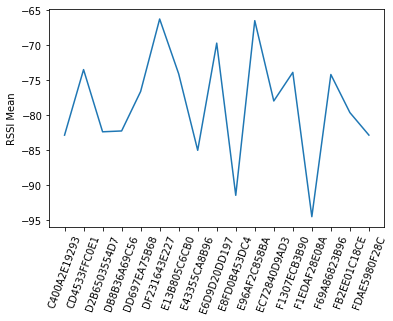

In [5]:
m = data[data['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)
plt.xticks(np.arange(17), scanners, rotation=70)
plt.ylabel("RSSI Mean")
plt.show()

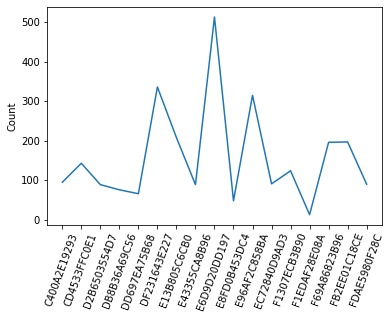

In [6]:
m = data[data['location'] == "V1_23"].describe().loc["count", :]
plt.plot(np.arange(17), m)
plt.xticks(np.arange(17), scanners, rotation=70)
plt.ylabel("Count")
plt.show()

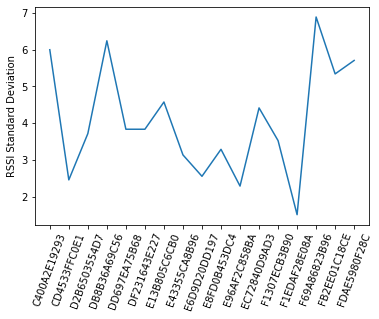

In [7]:
m = data[data['location'] == "V1_23"].describe().loc["std", :]
plt.plot(np.arange(17), m)
plt.xticks(np.arange(17), scanners, rotation=70)
plt.ylabel("RSSI Standard Deviation")
plt.show()

In [8]:
data[data['location'] == "V1_23"].describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,95.000000,143.000000,89.000000,76.000000,66.000000,336.000000,208.000000,89.000000,513.000000,48.000000,315.000000,91.000000,124.000000,13.000000,196.000000,197.000000,90.000000
mean,-82.863158,-73.475524,-82.382022,-82.263158,-76.606061,-66.229167,-74.081731,-85.033708,-69.684211,-91.479167,-66.466667,-77.967033,-73.870968,-94.538462,-74.178571,-79.629442,-82.855556
std,6.001082,2.454752,3.715770,6.244717,3.834575,3.834390,4.576568,3.135027,2.552129,3.287563,2.285652,4.415756,3.524520,1.506397,6.892861,5.342336,5.709368
min,-92.000000,-80.000000,-92.000000,-97.000000,-96.000000,-82.000000,-94.000000,-94.000000,-81.000000,-98.000000,-73.000000,-94.000000,-82.000000,-98.000000,-92.000000,-91.000000,-96.000000
25%,-89.500000,-75.000000,-84.000000,-89.000000,-79.000000,-67.000000,-77.000000,-87.000000,-71.000000,-94.000000,-69.000000,-78.500000,-75.000000,-95.000000,-77.000000,-81.000000,-89.000000
50%,-82.000000,-73.000000,-84.000000,-81.000000,-77.000000,-64.000000,-73.000000,-84.000000,-69.000000,-91.000000,-66.000000,-77.000000,-74.000000,-94.000000,-72.000000,-78.000000,-80.000000
75%,-77.000000,-72.000000,-79.000000,-77.000000,-73.250000,-64.000000,-70.000000,-82.000000,-68.000000,-89.000000,-65.000000,-75.000000,-71.500000,-93.000000,-69.000000,-75.000000,-78.000000
max,-76.000000,-69.000000,-76.000000,-75.000000,-72.000000,-62.000000,-68.000000,-81.000000,-65.000000,-85.000000,-62.000000,-74.000000,-68.000000,-93.000000,-66.000000,-71.000000,-77.000000


## Inspect Data based on Location and Scanner
1. Scanners further away have a low sample rate

In [9]:
def loc_scanner(loc, scanner):
    V1 = data[data['location'] == loc]
    plt.figure()
    plt.plot(np.arange(V1.shape[0]), V1[scanner])
    plt.show()
    
    plt.figure()
    plt.hist(V1[scanner])
    plt.show()

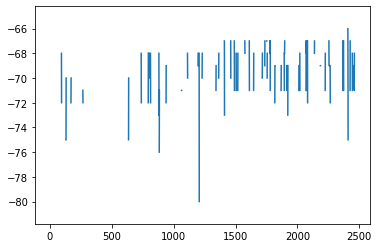

/home/mimos/anaconda3/envs/loc/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mimos/anaconda3/envs/loc/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


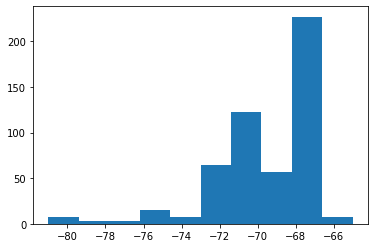

In [10]:
loc_scanner("V1_23", "E6D9D20DD197")

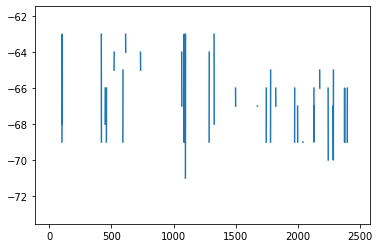

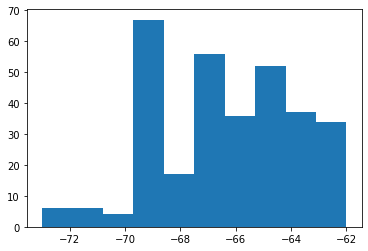

In [11]:
loc_scanner("V1_23", "E96AF2C858BA")

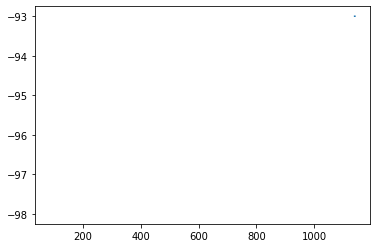

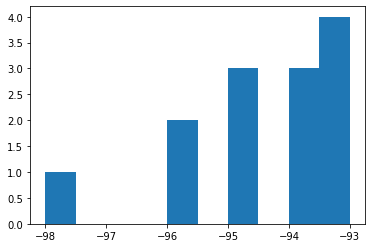

In [12]:
loc_scanner("V1_23", "F1EDAF28E08A")

## Group by Data within a Fixed Interval
1. The mean RSSI is correlated with sample rate
2. Standard deviation of the scanners closed to the beacon is at middle level

In [13]:
data_mean = data.groupby(["location", pd.Grouper(key="time", freq="5s")]).mean().reset_index()
data_mean

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,2019-12-12 00:56:30,-68.846154,-81.125000,-91.000000,-70.285714,-73.400000,-87.500000,-85.600000,-75.375000,NaN,-78.750000,-88.714286,-76.000000,-65.230769,-77.916667,-73.222222,NaN,-74.181818
1,V1_10,2019-12-12 00:56:35,-70.466667,-80.800000,-90.000000,-64.200000,-73.666667,-84.500000,-84.333333,-74.312500,NaN,-78.166667,-88.000000,-78.571429,-65.000000,-80.565217,-73.571429,NaN,-73.071429
2,V1_10,2019-12-12 00:56:40,-70.882353,-81.307692,-90.500000,-68.125000,-74.619048,-82.500000,-87.000000,-74.466667,NaN,-78.571429,-85.571429,-72.647059,-64.555556,-81.695652,-73.333333,-93.500000,-72.250000
3,V1_10,2019-12-12 00:56:45,-71.800000,-79.375000,-87.000000,-67.666667,-74.357143,-82.750000,-84.500000,-74.222222,NaN,-76.000000,-87.666667,-74.090909,-64.833333,-76.842105,-75.600000,NaN,-71.739130
4,V1_10,2019-12-12 00:56:50,-71.266667,-81.000000,-86.636364,-67.166667,-73.533333,-83.000000,-87.125000,-72.600000,NaN,-80.153846,-90.166667,-71.846154,-64.625000,-78.125000,-72.777778,-94.500000,-73.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,V1_9,2019-12-12 01:12:30,-70.384615,-76.200000,-80.571429,-64.142857,-72.833333,-87.833333,-84.000000,-63.650000,-88.50,-89.750000,-89.800000,-65.923077,-74.333333,-73.352941,-76.000000,-92.800000,-78.583333
534,V1_9,2019-12-12 01:12:35,-71.846154,-78.250000,-81.200000,-63.545455,-75.222222,-88.857143,-87.000000,-64.352941,-88.75,-90.000000,-89.000000,-65.857143,-73.000000,-72.722222,-76.125000,-93.666667,-78.300000
535,V1_9,2019-12-12 01:12:40,-70.636364,-76.916667,-80.333333,-63.692308,-73.625000,-89.600000,-86.750000,-63.142857,-90.00,-88.200000,-94.000000,-66.538462,-72.800000,-72.900000,-73.777778,-92.750000,-77.833333
536,V1_9,2019-12-12 01:12:45,-71.230769,-78.250000,-80.428571,-62.823529,-73.000000,-85.750000,-87.666667,-63.071429,-90.40,-90.000000,-90.400000,-65.916667,-75.222222,-73.615385,-74.888889,-94.000000,-77.375000


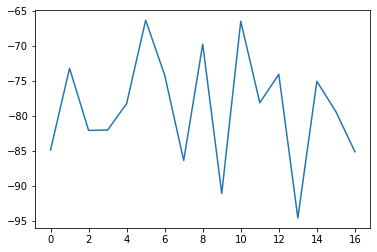

In [14]:
m = data_mean[data_mean['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

In [15]:
data_median = data.groupby(["location", pd.Grouper(key="time", freq="5s")]).median().reset_index()
data_median

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,2019-12-12 00:56:30,-68.0,-81.5,-91.0,-69.0,-72.0,-87.5,-84.0,-75.0,NaN,-79.0,-89.0,-75.0,-66.0,-76.5,-75.0,NaN,-74.0
1,V1_10,2019-12-12 00:56:35,-70.0,-82.0,-90.0,-60.0,-71.0,-83.0,-83.0,-73.0,NaN,-78.5,-88.0,-80.0,-65.0,-82.0,-75.0,NaN,-73.0
2,V1_10,2019-12-12 00:56:40,-71.0,-82.0,-89.5,-67.5,-72.0,-83.0,-87.0,-75.0,NaN,-79.0,-86.0,-72.0,-64.0,-78.0,-73.5,-93.5,-72.0
3,V1_10,2019-12-12 00:56:45,-71.5,-79.0,-88.0,-68.0,-71.0,-83.5,-84.5,-73.0,NaN,-75.0,-88.0,-74.0,-64.0,-76.0,-73.5,NaN,-72.0
4,V1_10,2019-12-12 00:56:50,-71.0,-81.0,-84.0,-68.0,-73.0,-83.0,-87.0,-71.0,NaN,-80.0,-89.5,-71.0,-64.5,-77.0,-71.0,-94.5,-73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,V1_9,2019-12-12 01:12:30,-71.0,-76.0,-80.0,-63.0,-71.5,-88.0,-84.0,-62.5,-89.0,-90.0,-91.0,-66.0,-75.0,-74.0,-76.0,-92.0,-77.0
534,V1_9,2019-12-12 01:12:35,-71.0,-77.0,-82.0,-63.0,-76.0,-88.0,-87.0,-63.0,-88.5,-91.0,-91.0,-66.0,-72.5,-72.0,-76.0,-94.0,-76.5
535,V1_9,2019-12-12 01:12:40,-70.0,-76.0,-80.0,-63.0,-73.0,-91.0,-85.0,-63.0,-89.0,-89.0,-95.0,-66.0,-72.0,-72.0,-74.0,-92.5,-76.0
536,V1_9,2019-12-12 01:12:45,-70.0,-77.5,-80.0,-63.0,-71.0,-86.0,-86.0,-63.0,-89.0,-91.0,-91.0,-66.0,-75.0,-74.0,-74.0,-94.0,-76.5


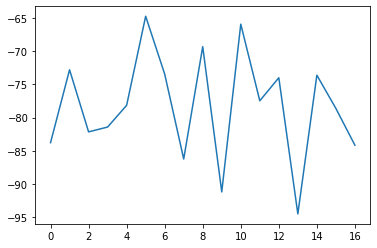

In [16]:
m = data_median[data_median['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

In [17]:
data_std = data.groupby(["location", pd.Grouper(key="time", freq="5s")]).std().reset_index()
data_std

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,2019-12-12 00:56:30,1.281025,4.486090,NaN,7.587584,2.190890,9.192388,3.781534,3.518996,NaN,2.927146,1.380131,4.123106,1.165751,4.399552,3.833333,NaN,2.750207
1,V1_10,2019-12-12 00:56:35,2.614975,4.604346,2.529822,6.303438,5.507571,4.415880,3.214550,4.222460,NaN,1.722401,1.095445,3.207135,1.000000,5.679517,3.207135,NaN,3.583387
2,V1_10,2019-12-12 00:56:40,2.955553,3.816294,4.324350,6.936618,4.443829,1.914854,0.000000,4.015446,NaN,3.952094,2.070197,2.782561,2.994548,6.670388,2.870962,0.707107,3.092861
3,V1_10,2019-12-12 00:56:45,1.549193,2.825269,2.645751,5.348463,5.904459,1.892969,1.870829,3.382964,NaN,3.041381,3.640055,3.015113,3.379977,3.077935,5.758086,NaN,2.220102
4,V1_10,2019-12-12 00:56:50,3.348063,4.535574,3.801913,5.219428,3.642344,2.097618,3.181981,4.371989,NaN,4.793158,2.926887,2.339735,2.473190,4.410215,4.066442,0.707107,6.287222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,V1_9,2019-12-12 01:12:30,1.043908,0.447214,0.975900,1.703261,2.483277,0.752773,0.000000,3.216323,1.309307,1.388730,3.271085,0.759555,2.915476,1.868863,1.247219,2.167948,3.287949
534,V1_9,2019-12-12 01:12:35,2.853248,3.807887,1.095445,1.863525,3.192874,2.115701,0.000000,3.707108,1.764550,1.632993,5.147815,1.069045,1.414214,1.274434,0.834523,1.632993,3.465705
535,V1_9,2019-12-12 01:12:40,1.501514,1.781640,1.366260,1.493576,4.172615,2.408319,4.272002,2.107026,1.802776,1.095445,2.449490,1.330124,1.788854,1.852926,1.092906,2.061553,3.816630
536,V1_9,2019-12-12 01:12:45,2.385856,3.593976,0.786796,1.131111,3.937004,1.500000,3.785939,2.129077,2.509980,2.000000,5.079370,0.900337,2.438123,1.660244,3.822448,NaN,3.700869


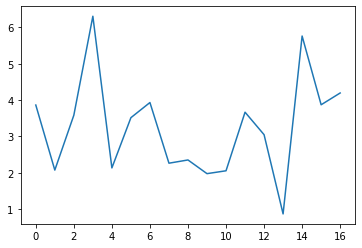

In [18]:
m = data_std[data_std['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

In [19]:
data_count = data.groupby(["location", pd.Grouper(key="time", freq="5s")]).count().reset_index()
data_count

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,2019-12-12 00:56:30,13,8,1,7,5,2,5,16,0,12,7,9,13,12,9,0,11
1,V1_10,2019-12-12 00:56:35,15,5,6,10,3,6,3,16,0,6,6,7,11,23,7,0,14
2,V1_10,2019-12-12 00:56:40,17,13,6,16,21,4,2,15,0,7,7,17,18,23,12,2,20
3,V1_10,2019-12-12 00:56:45,10,8,3,12,14,4,6,9,0,9,9,11,12,19,10,0,23
4,V1_10,2019-12-12 00:56:50,15,15,11,12,15,6,8,15,0,13,6,13,16,16,18,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,V1_9,2019-12-12 01:12:30,13,5,7,14,6,6,2,20,8,8,5,13,9,17,10,5,12
534,V1_9,2019-12-12 01:12:35,13,8,5,11,9,7,2,17,12,10,5,7,4,18,8,6,10
535,V1_9,2019-12-12 01:12:40,11,12,6,13,8,5,4,14,9,5,6,13,5,10,9,4,6
536,V1_9,2019-12-12 01:12:45,13,4,7,17,5,4,3,14,5,7,5,12,9,13,9,1,8


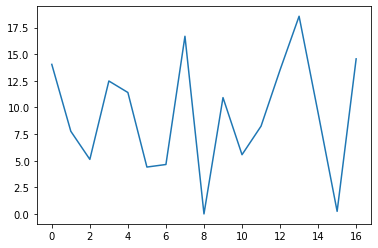

In [20]:
m = data_count[data_count['location'] == "V1_10"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

## Rolling Data

In [21]:
data.set_index("time", inplace=True)

In [22]:
data_rolled = data.groupby("location").rolling(15, min_periods=1).mean().reset_index()
data_rolled

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,2019-12-12 00:56:31.339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-89.0,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,2019-12-12 00:56:31.397,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,-89.0,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,2019-12-12 00:56:31.434,-68.0,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,-89.0,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,2019-12-12 00:56:31.496,-68.0,NaN,NaN,NaN,NaN,NaN,-82.0,-84.000000,NaN,NaN,-89.0,NaN,NaN,-75.0,NaN,NaN,NaN
4,V1_10,2019-12-12 00:56:31.540,-68.0,NaN,NaN,NaN,NaN,NaN,-82.0,-84.000000,NaN,NaN,-89.0,NaN,-66.0,-75.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,V1_9,2019-12-12 01:12:51.888,NaN,NaN,-78.0,-62.333333,NaN,NaN,NaN,-62.500000,NaN,-89.0,-89.0,-67.0,-72.0,-71.5,-76.0,-92.0,NaN
49659,V1_9,2019-12-12 01:12:51.940,NaN,NaN,-78.0,-62.500000,NaN,NaN,NaN,-62.500000,NaN,-89.0,-89.0,-67.0,-72.0,-71.5,-76.0,-93.0,NaN
49660,V1_9,2019-12-12 01:12:52.001,NaN,NaN,-78.0,-62.500000,NaN,NaN,NaN,-62.500000,NaN,-89.0,-89.0,-67.0,-72.5,-71.5,-76.0,-93.0,NaN
49661,V1_9,2019-12-12 01:12:52.025,NaN,NaN,-78.0,-62.500000,NaN,NaN,NaN,-62.666667,NaN,-89.0,-89.0,-67.0,-73.0,-71.5,-76.0,-93.0,NaN


In [23]:
data_rolled.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,29917.000000,30832.000000,26502.000000,31772.000000,29658.000000,29502.000000,30076.000000,30920.000000,30019.000000,21794.000000,27755.000000,29730.000000,31766.000000,25559.000000,26376.000000,19153.000000,31940.000000
mean,-75.194723,-76.566257,-79.136275,-75.272591,-74.569129,-76.356272,-76.782197,-76.485073,-78.680457,-80.328590,-79.504936,-72.739159,-71.164447,-80.135093,-75.679381,-83.629513,-77.279332
std,9.105916,7.560297,6.996813,8.076175,6.700199,8.931211,8.782790,8.864373,10.520016,10.250394,10.682188,7.372222,7.447680,9.215365,8.516111,7.753974,7.803038
min,-97.000000,-97.000000,-97.000000,-98.000000,-97.000000,-98.000000,-97.000000,-97.000000,-98.000000,-98.000000,-98.000000,-96.000000,-96.000000,-98.000000,-98.000000,-98.000000,-98.000000
25%,-82.000000,-82.000000,-84.000000,-81.000000,-79.000000,-83.000000,-84.000000,-84.000000,-87.000000,-89.000000,-89.000000,-78.000000,-76.000000,-89.000000,-81.666667,-91.000000,-83.500000
50%,-73.000000,-76.000000,-80.000000,-75.666667,-74.000000,-75.500000,-78.000000,-75.500000,-80.000000,-81.000000,-81.000000,-72.000000,-72.000000,-79.500000,-75.750000,-85.000000,-76.500000
75%,-69.500000,-70.000000,-74.000000,-69.000000,-69.500000,-70.000000,-70.000000,-69.500000,-72.500000,-75.000000,-69.000000,-68.000000,-65.000000,-72.666667,-71.000000,-76.750000,-72.000000
max,-57.000000,-63.000000,-64.000000,-58.000000,-59.000000,-55.000000,-53.000000,-61.000000,-49.000000,-58.000000,-52.000000,-55.000000,-54.000000,-63.000000,-56.000000,-66.000000,-60.000000


In [24]:
data_rolled.isna().sum()

location            0
time                0
C400A2E19293    19746
CD4533FFC0E1    18831
D2B6503554D7    23161
DB8B36A69C56    17891
DD697EA75B68    20005
DF231643E227    20161
E13B805C6CB0    19587
E43355CA8B96    18743
E6D9D20DD197    19644
E8FD0B453DC4    27869
E96AF2C858BA    21908
EC72840D9AD3    19933
F1307ECB3B90    17897
F1EDAF28E08A    24104
F69A86823B96    23287
FB2EE01C18CE    30510
FDAE5980F28C    17723
dtype: int64

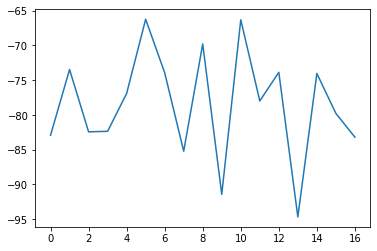

In [25]:
m = data_rolled[data_rolled['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

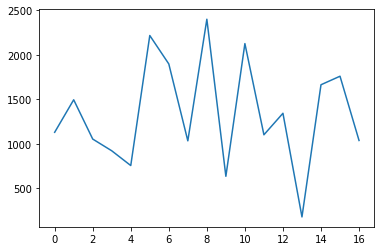

In [26]:
m = data_rolled[data_rolled['location'] == "V1_23"].describe().loc["count", :]
plt.plot(np.arange(17), m)

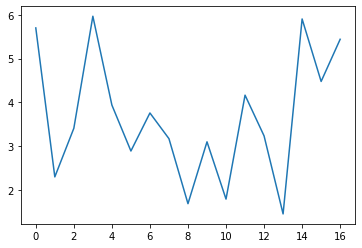

In [27]:
m = data_rolled[data_rolled['location'] == "V1_23"].describe().loc["std", :]
plt.plot(np.arange(17), m)

In [28]:
def loc_scanner(loc, scanner):
    V1 = data_rolled[data_rolled['location'] == loc]
    V1_real = data[data['location'] == loc]
    plt.figure()
    plt.plot(np.arange(V1.shape[0]), V1[scanner], label="Smoothed")
    plt.plot(np.arange(V1_real.shape[0]), V1_real[scanner], label="Real")
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.hist(V1[scanner])
    plt.show()

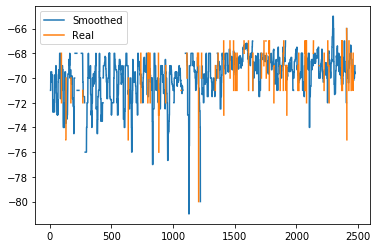

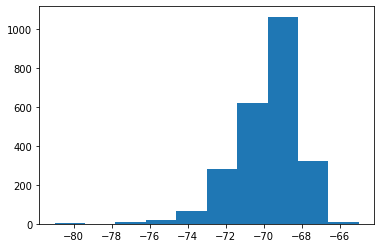

In [29]:
loc_scanner("V1_23", "E6D9D20DD197")

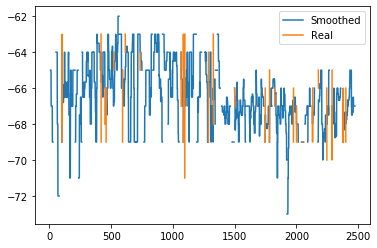

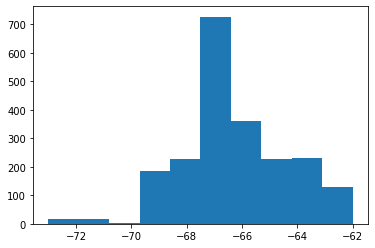

In [30]:
loc_scanner("V1_23", "E96AF2C858BA")

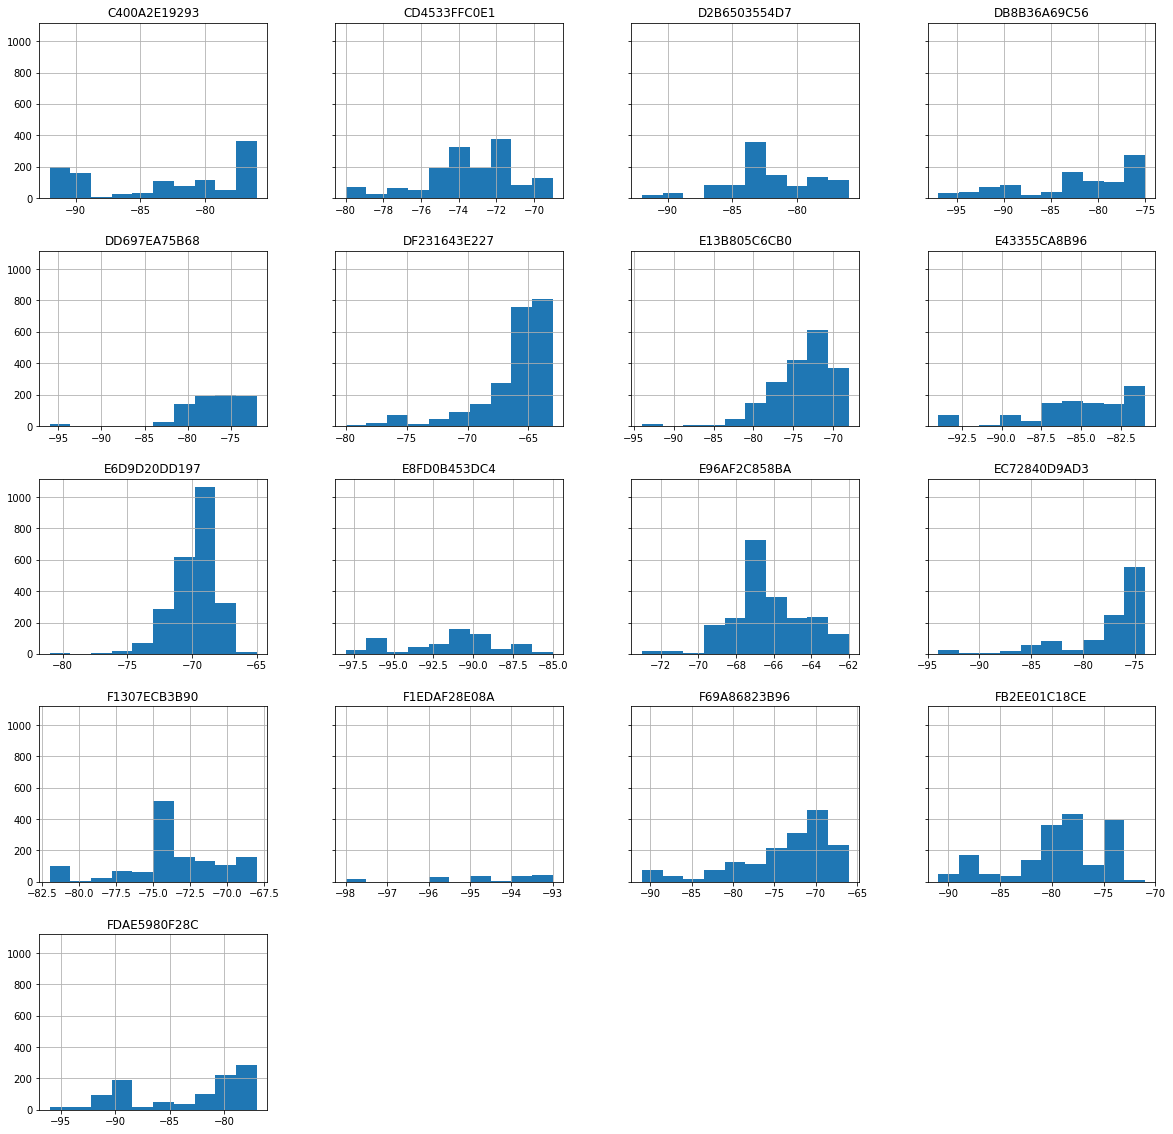

In [31]:
data_rolled[data_rolled['location'] == "V1_23"].hist(figsize=(20,20), sharey=True)
plt.show()

## Inspect Sample Rate across Time

In [32]:
data

,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
time,,,,,,,,,,,,,,,,,,
2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-12 01:47:54.481,V1_26,-69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-12 01:47:54.683,V1_26,NaN,NaN,NaN,-77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-12 01:47:54.736,V1_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data_grouped = data.groupby(["location", pd.Grouper(freq="1s")]).mean().reset_index()
data_grouped

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,2019-12-12 00:56:31,-68.666667,-87.00,NaN,NaN,NaN,-81.0,-86.5,-77.250000,NaN,-77.333333,-88.333333,-77.00,-65.666667,-75.000000,-76.500000,NaN,-71.000000
1,V1_10,2019-12-12 00:56:32,-68.250000,-79.75,NaN,-70.800000,-73.666667,-94.0,-83.0,-76.000000,NaN,-81.333333,-89.000000,-72.75,-65.000000,-79.500000,-69.000000,NaN,-78.500000
2,V1_10,2019-12-12 00:56:33,-69.000000,-83.50,NaN,-70.000000,-72.000000,NaN,-86.0,-74.750000,NaN,-77.500000,-91.000000,-77.00,-65.500000,NaN,-73.000000,NaN,-74.333333
3,V1_10,2019-12-12 00:56:34,-69.500000,-76.00,-91.000000,-68.000000,-74.000000,NaN,NaN,-72.666667,NaN,-78.500000,-88.000000,-81.00,-65.000000,-77.428571,-74.000000,NaN,-73.500000
4,V1_10,2019-12-12 00:56:35,-69.000000,NaN,NaN,-68.000000,NaN,-82.0,NaN,-75.000000,NaN,-76.500000,NaN,NaN,-64.666667,-81.000000,-75.000000,NaN,-70.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,V1_9,2019-12-12 01:12:48,-73.000000,-77.00,NaN,-63.666667,-71.333333,-87.0,NaN,NaN,-90.5,-92.000000,-93.000000,-66.25,-76.500000,-73.285714,-74.666667,NaN,-76.000000
2562,V1_9,2019-12-12 01:12:49,-70.000000,-76.00,-80.333333,-62.666667,-75.500000,-84.5,NaN,-63.666667,-88.0,-88.000000,-87.500000,-66.00,-74.000000,-73.666667,-80.000000,NaN,-77.000000
2563,V1_9,2019-12-12 01:12:50,-70.500000,-81.50,NaN,-63.500000,-71.333333,-87.0,NaN,-64.200000,-89.0,-89.000000,-87.333333,-66.60,-77.000000,-74.000000,NaN,-92.0,-78.000000
2564,V1_9,2019-12-12 01:12:51,-77.000000,NaN,-78.000000,-63.333333,NaN,NaN,NaN,-62.500000,NaN,-89.000000,-90.000000,-67.50,-75.500000,-71.500000,-76.000000,-93.0,NaN


In [34]:
def get_sample_rate(data, location):
    return data[data['location'] == location][scanners].count(axis=1)

In [35]:
def plot_sample_rate(data, location):
    sample_rate = get_sample_rate(data, location)
    x = np.arange(len(sample_rate))

    plt.plot(x, sample_rate)
    plt.title("Sample rate of {}".format(location))
    plt.show()

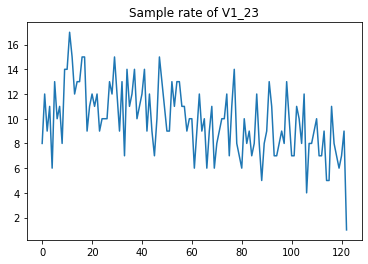

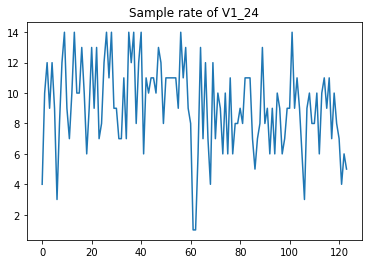

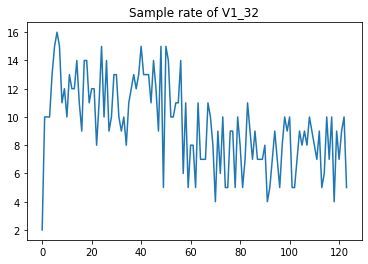

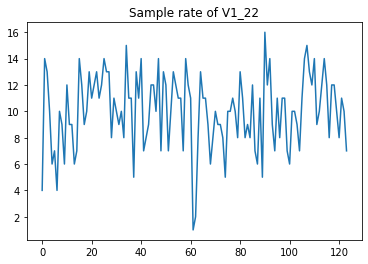

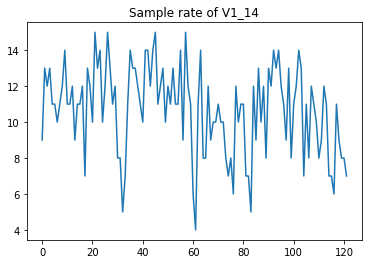

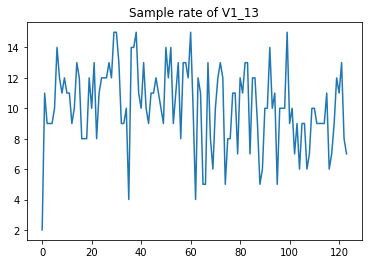

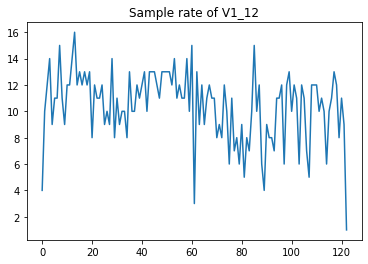

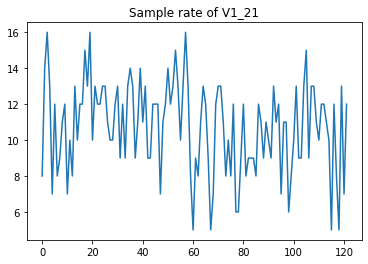

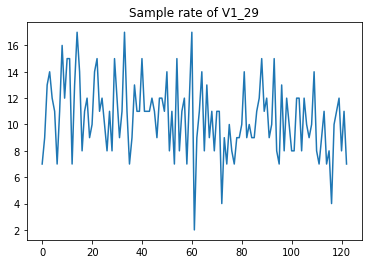

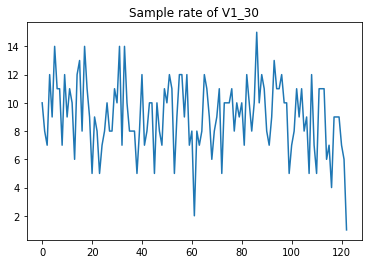

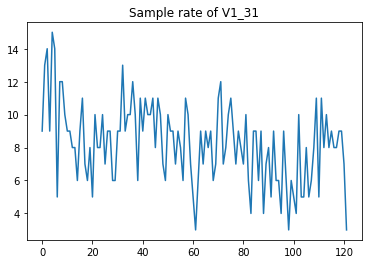

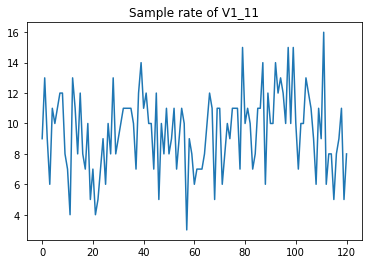

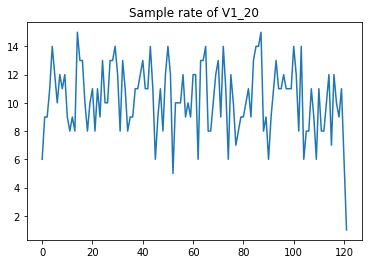

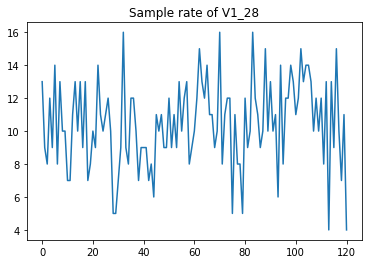

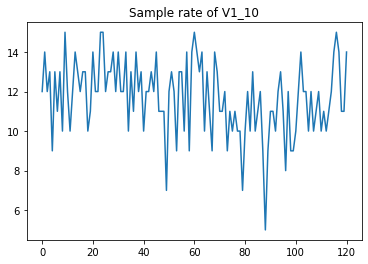

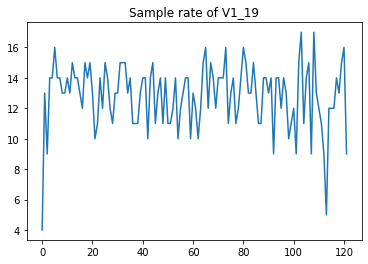

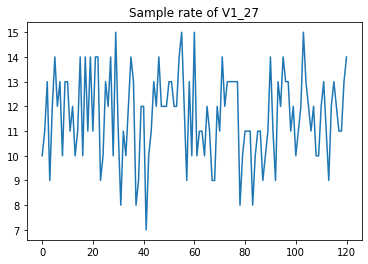

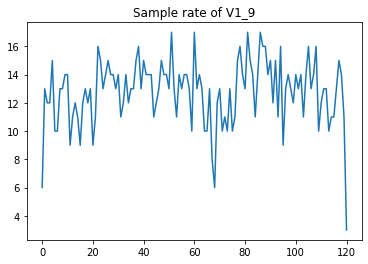

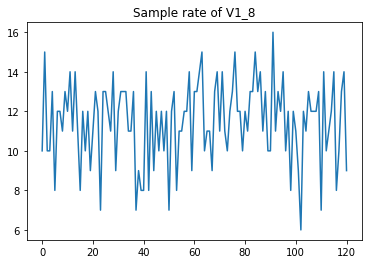

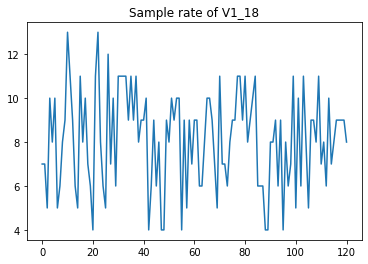

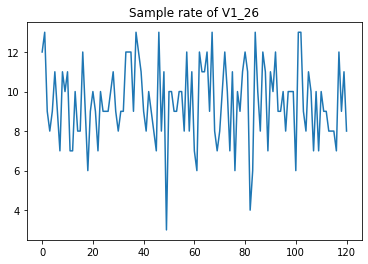

In [36]:
locations = ["V1_23", "V1_24", "V1_32", "V1_22", "V1_14", "V1_13", "V1_12", "V1_21", "V1_29", "V1_30", "V1_31", "V1_11", "V1_20", "V1_28", "V1_10", "V1_19", "V1_27", "V1_9", "V1_8", "V1_18", "V1_26"]
for loc in locations:
    plot_sample_rate(data_grouped, loc)

In [40]:
data_rolled = data.groupby("location").rolling(15, min_periods=1).mean().reset_index()
data_rolled

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,2019-12-12 00:56:31.339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-89.0,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,2019-12-12 00:56:31.397,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,-89.0,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,2019-12-12 00:56:31.434,-68.0,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,-89.0,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,2019-12-12 00:56:31.496,-68.0,NaN,NaN,NaN,NaN,NaN,-82.0,-84.000000,NaN,NaN,-89.0,NaN,NaN,-75.0,NaN,NaN,NaN
4,V1_10,2019-12-12 00:56:31.540,-68.0,NaN,NaN,NaN,NaN,NaN,-82.0,-84.000000,NaN,NaN,-89.0,NaN,-66.0,-75.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,V1_9,2019-12-12 01:12:51.888,NaN,NaN,-78.0,-62.333333,NaN,NaN,NaN,-62.500000,NaN,-89.0,-89.0,-67.0,-72.0,-71.5,-76.0,-92.0,NaN
49659,V1_9,2019-12-12 01:12:51.940,NaN,NaN,-78.0,-62.500000,NaN,NaN,NaN,-62.500000,NaN,-89.0,-89.0,-67.0,-72.0,-71.5,-76.0,-93.0,NaN
49660,V1_9,2019-12-12 01:12:52.001,NaN,NaN,-78.0,-62.500000,NaN,NaN,NaN,-62.500000,NaN,-89.0,-89.0,-67.0,-72.5,-71.5,-76.0,-93.0,NaN
49661,V1_9,2019-12-12 01:12:52.025,NaN,NaN,-78.0,-62.500000,NaN,NaN,NaN,-62.666667,NaN,-89.0,-89.0,-67.0,-73.0,-71.5,-76.0,-93.0,NaN


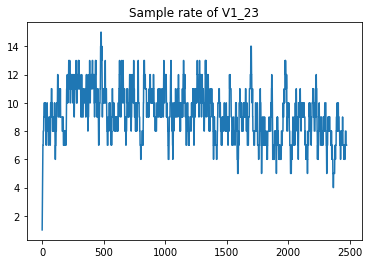

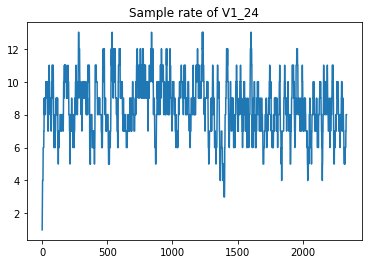

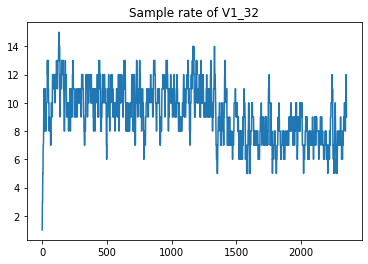

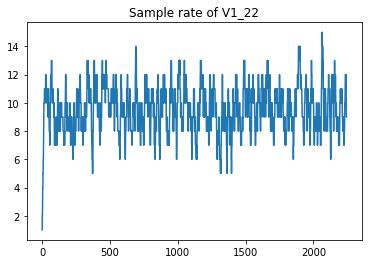

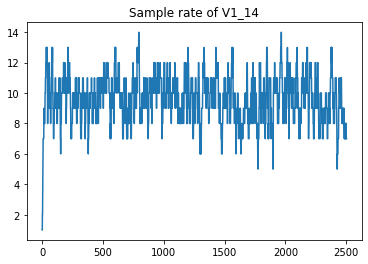

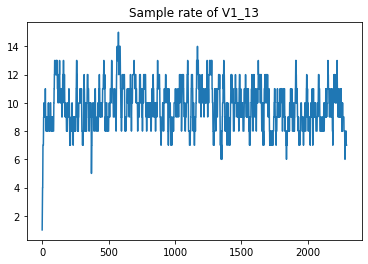

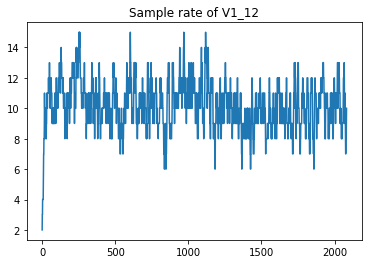

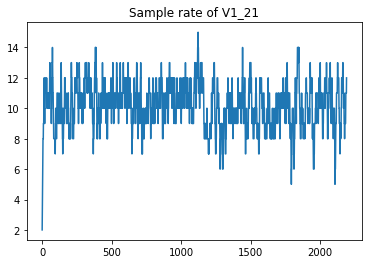

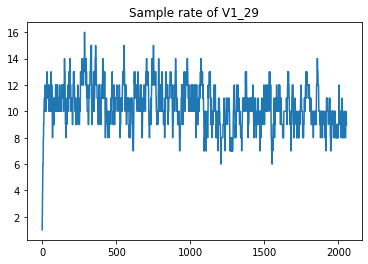

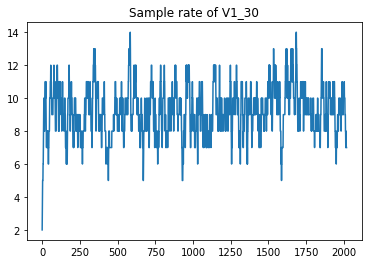

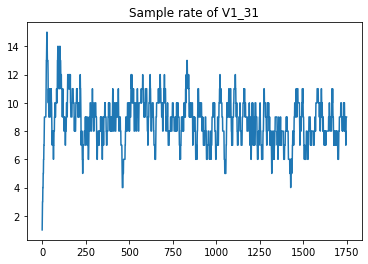

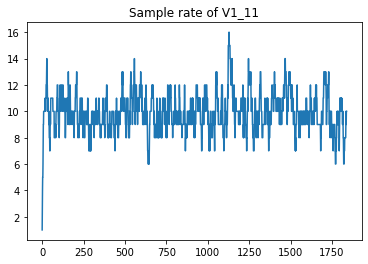

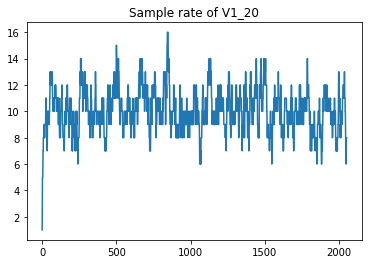

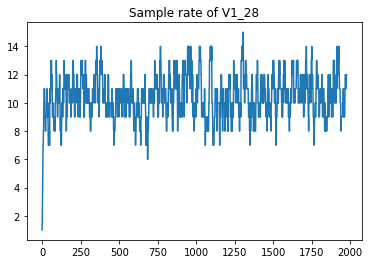

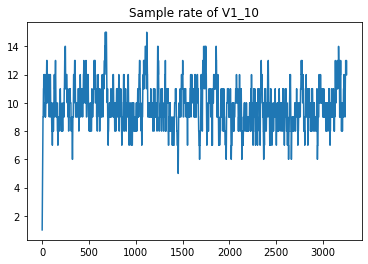

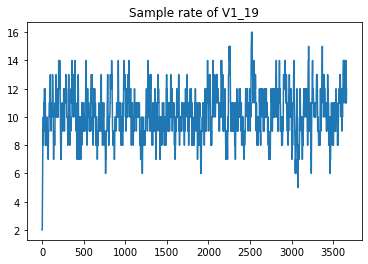

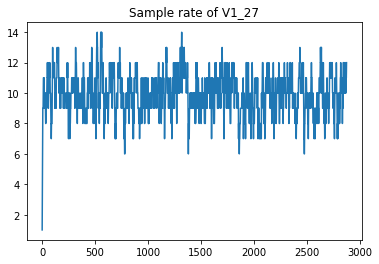

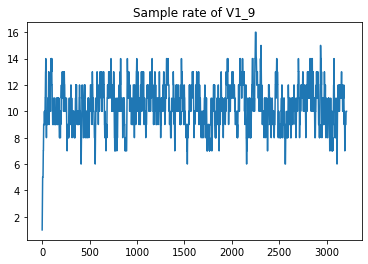

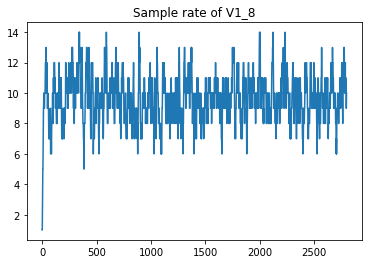

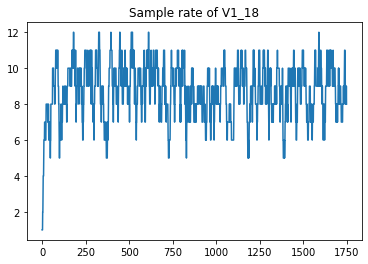

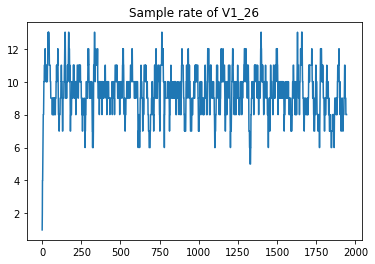

In [41]:
for loc in locations:
    plot_sample_rate(data_rolled, loc)